<a href="https://colab.research.google.com/github/HeshanNavindu-7/Brain-Tumor-MRI/blob/main/Brain_Tumor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install opendatasets

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od
import os
import random
import matplotlib.pyplot as plt
import cv2





In [ ]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:01<00:00, 113MB/s]


In [ ]:
#define path
dataset_dir="/content/brain-tumor-mri-dataset"
class_count={}
for mri_class in os.listdir(dataset_dir):
  print(mri_class)
  class_dir= os.path.join(dataset_dir,mri_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[mri_class]=num_images


Training
Testing


Train Data
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


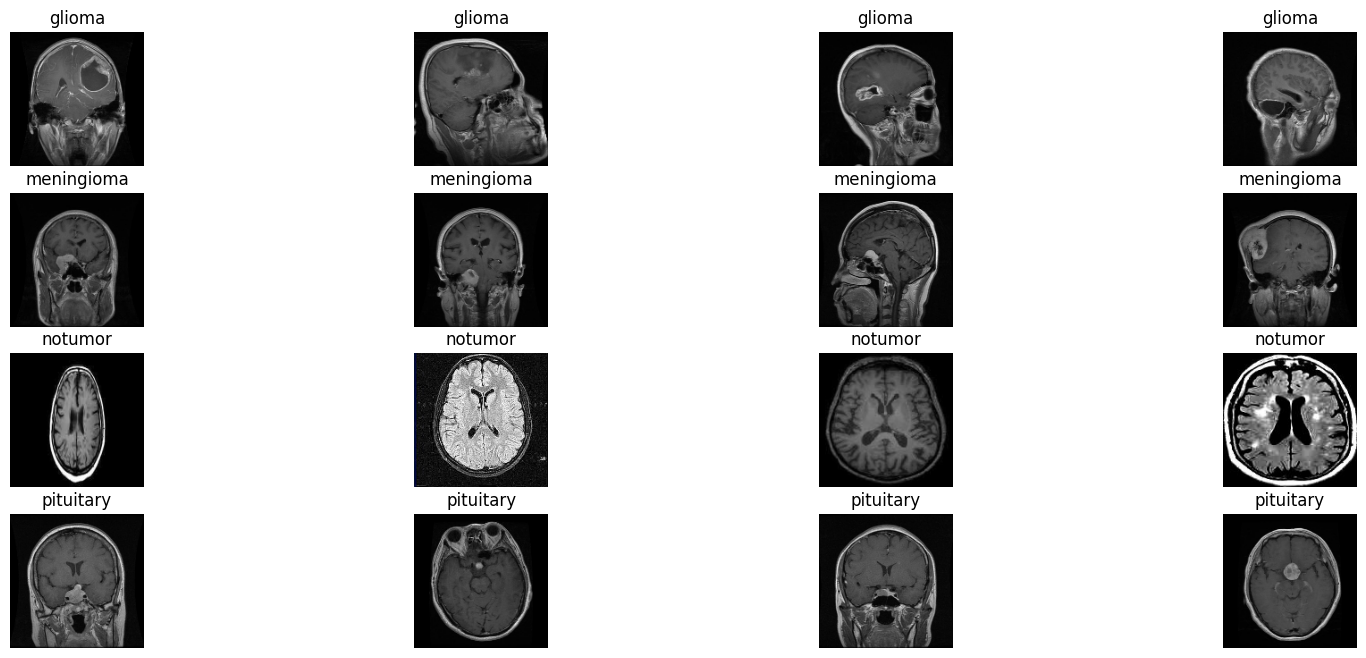

Test Data
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


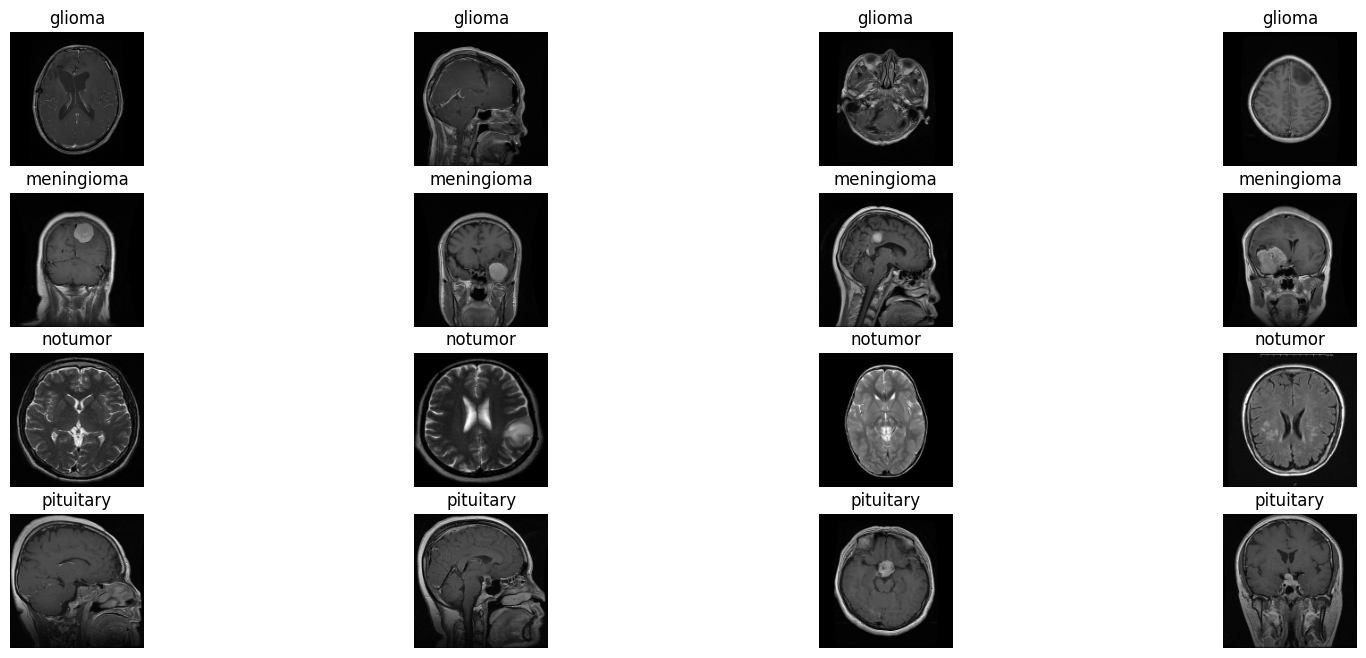

In [ ]:

# Define subdirectories for train and test data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define classes
classes = ['glioma', 'meningioma','notumor','pituitary']

# Display sample data
def display_sample(directory, num_samples=4):
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(20, 8))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)
    plt.show()

print("Train Data")
display_sample(train_dir)
print("Test Data")
display_sample(test_dir)

## preprocessing and augmenting

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define preprocessing and data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    validation_split=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## Build DL Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    Dropout(0.25),  # Dropout after the first convolutional layer
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),  # Dropout after the second convolutional layer
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.25),  # Dropout after the third convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout after the dense layer
    Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [12]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 9.5 MB/s eta 0:00:00


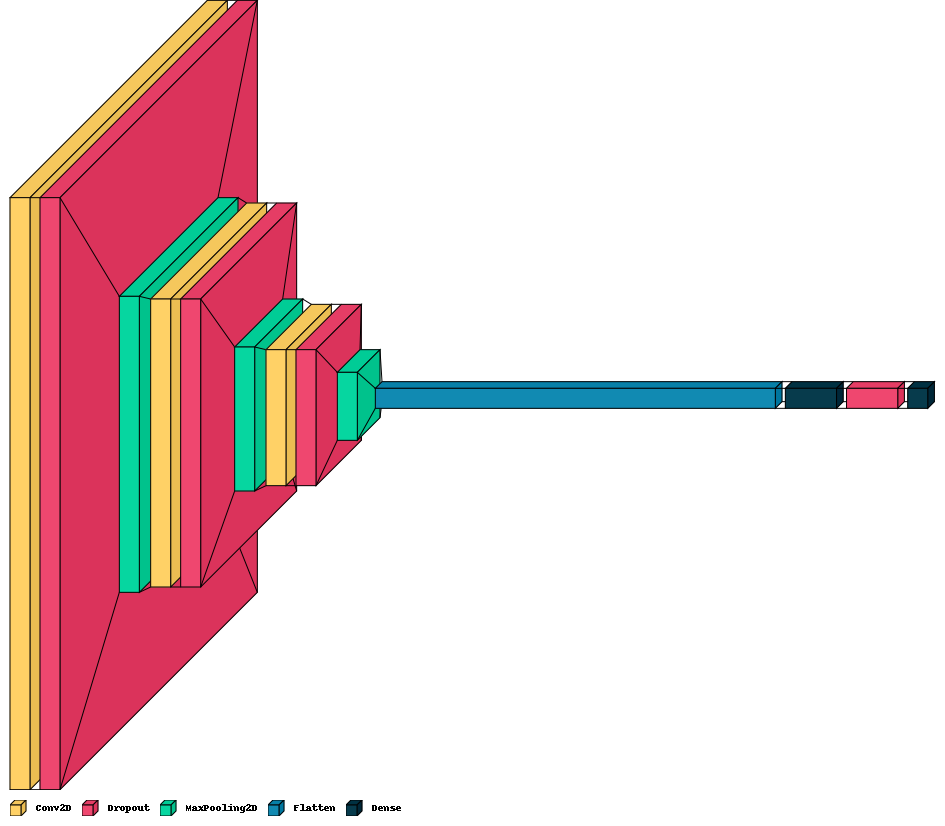

In [13]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/15
178/178 [==============================] - 430s 2s/step - loss: -8295121408.0000 - accuracy: 0.2340 - val_loss: -29097142272.0000 - val_accuracy: 0.2344
Epoch 2/15
178/178 [==============================] - 420s 2s/step - loss: -1289459990528.0000 - accuracy: 0.2347 - val_loss: -2017622097920.0000 - val_accuracy: 0.2352
Epoch 3/15
178/178 [==============================] - 425s 2s/step - loss: -18781134913536.0000 - accuracy: 0.2349 - val_loss: -19402997104640.0000 - val_accuracy: 0.2336
Epoch 4/15
121/178 [===================>..........] - ETA: 2:09 - loss: -84309604040704.0000 - accuracy: 0.2347

KeyboardInterrupt: 